<a href="https://colab.research.google.com/github/RodrigoHRuiz/Diplo2022_Grupo16/blob/main/Entregable_Parte_1_Intento_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [154]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [155]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [156]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.00,3.00,3.00,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.00,2.00,2.00,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.00,0.00,0.00,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [157]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### A) Explorar los datos
Ordnar los registros por la columna "salary_monthly_NETO" en orden ascendente para ver qué datos son los menores

In [158]:
df.sort_values(by=['salary_monthly_NETO'], inplace=True)
df['salary_monthly_NETO'].head(20)

424     1.00
2265    1.00
2866    1.00
2195    1.00
3873    2.00
5363    9.00
4390   13.00
1344   15.00
4948   17.00
5766   17.30
2467   18.00
241    18.23
2292   19.90
4501   25.00
103    27.00
3277   27.34
2352   30.00
5610   30.00
4343   30.00
4894   30.00
Name: salary_monthly_NETO, dtype: float64

In [159]:
Cuenta=len(df[df['salary_monthly_NETO']<30000])
Cuenta

387

###B) Quitar los salarios menores a ARS 30000, valores extremos e inspeccionar el resultado
Se define un salario mínimo que se quiere considerar de ARS 30000 ya que un salario menor no sería de interés para determinar un lenguaje con un buen salario. Entendiendo por "buen salario", un monto superior a ARS 30000.
Luego, se quitan los valores extremos que se encuentran a más 2.5 IQR deL cuartil más cercano. Además, de esta forma también se descartan los registros de las encuestas donde no hayan proporcionado el dato del salario.

In [160]:
#Obtener un dataframe nuevo "df2" que solo tiene los registros donde el salario mensual es mayor a 30000
print("Tamaño df original: ", df.shape)
df2 = df[df['salary_monthly_NETO'] > 30000]
print("Tamaño df reducido: ", df2.shape)

Tamaño df original:  (6095, 48)
Tamaño df reducido:  (5461, 48)


In [161]:
#Quitar los outliers y obtener un dataframe nuevo df3 con los registros "útiles"
Q1 = df2["salary_monthly_NETO"].quantile(.25)
Q3 = df2["salary_monthly_NETO"].quantile(.75)
IQR = Q3 - Q1
df3 = df2[~((df2['salary_monthly_NETO']<(Q1 -2.5 * IQR))|(df2['salary_monthly_NETO']>(Q3 + 2.5 * IQR)))]
print('Q1: {} ::: Q2: {}'.format(int(Q1),int(Q3)))
print('Q1 - 2.5*IQR: {}\nQ3 + 2.5*IQR: {}'.format(int(Q1-2.5*IQR),int(Q3+2.5*IQR)))
print("Tamaño df quitando outliers: ", df3.shape)

Q1: 57000 ::: Q2: 110000
Q1 - 2.5*IQR: -75500
Q3 + 2.5*IQR: 242500
Tamaño df quitando outliers:  (5209, 48)


In [162]:
#DF comparando la estadística descriptiva según el trabajo que se hizo sobre cada una
d1=df["salary_monthly_NETO"].describe().apply(lambda x: '{0:,.2f}'.format(x))
d2=df2["salary_monthly_NETO"].describe().apply(lambda x: '{0:,.2f}'.format(x))
d3=df3["salary_monthly_NETO"].describe().apply(lambda x: '{0:,.2f}'.format(x))
df6=pd.DataFrame(data={'df': d1,'df2': d2,'df3':d3})
df6

,df,df2,df3
count,"5,883.00","5,461.00","5,209.00"
mean,"94,907.95","101,281.78","85,173.21"
std,"96,862.26","97,621.44","38,781.63"
min,1.00,"30,050.00","30,050.00"
25%,"51,480.00","57,000.00","56,000.00"
50%,"78,000.00","80,000.00","80,000.00"
75%,"106,000.00","110,000.00","105,000.00"
max,"2,080,000.00","2,080,000.00","240,000.00"


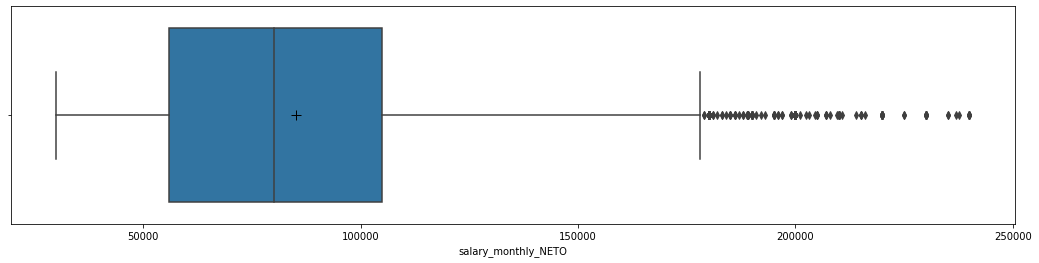

In [163]:
plt.figure(figsize=(18, 4))
sns.boxplot( x=df3['salary_monthly_NETO'],
            showmeans=True,meanprops={"marker": "+","markeredgecolor": "black","markersize": "10"})

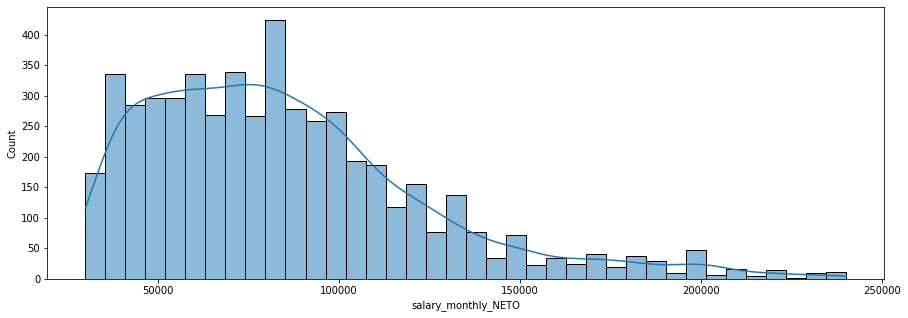

In [164]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df3["salary_monthly_NETO"], kde=True)

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [165]:
df3.tools_programming_languages[:3]

3175                              Python
1503    Javascript, PHP, SQL, TypeScript
3904                          Javascript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

Explorando los datos también se identificaron que había otras cadenas que no corresponden a lenguajes de programación, por lo que se incluyeron en la instrucción de reemplazo.

In [166]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '').replace('ninguno',' ')\
    .replace('.',' ').replace('-',' ').replace('programación',' ')\
    .replace('no',' ').replace('son',' ').replace('|',' ')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df3.loc[:, 'cured_programming_languages'] = df3.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df3_lang = df3.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df3[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df3_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.00,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.00,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.00,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.00,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.00,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [167]:
todos_lenguajes = list(df3_lang['programming_language'].unique())
a=len(todos_lenguajes)
a

179

In [168]:
language_count = df3_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count.head(10)

,language,frequency
0,javascript,2097
1,sql,1869
2,html,1556
3,java,1273
4,python,1260
5,css,1041
6,bash/shell,875
7,php,736
8,net,709
9,typescript,644


Se toma la determinación de descartar los lenguajes que representen menos de 0.5% del total de los datos, en base a su frecuencia.

In [169]:
#Frecuencia mínima aceptada
frecuencia_aceptada=len(df3_lang['programming_language'])*0.005
print(frecuencia_aceptada)



74.96000000000001


In [170]:
#Lista de lenguajes que no alcanzan la frecuencia mínima aceptada
Lenguajes_descartados=language_count[language_count['frequency']<frecuencia_aceptada]
Lenguajes_descartados

,language,frequency
20,cobol,72
21,r,72
22,abap,67
23,perl,52
24,powershell,39
...,...,...
174,salesforce,1
175,apps,1
176,powercli,1
177,boomi,1


## Filtrado de lenguajes relevantes
Se quitan del DF los lenguajes identificados para descartar.

In [171]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
NOT_interesting_languages = list(Lenguajes_descartados['language'].unique())
NOT_interesting_languages
filtered_df3_lang = df3_lang[~(df3_lang.programming_language.isin(NOT_interesting_languages))]
filtered_df3_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.00,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.00,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.00,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.00,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.00,"[bash/shell, c, css, html, java, javascript, p..."


Se adopta la mediana como estadístico para determinar la línea de corte. Se calcula cuántos casos por lenguaje están por encima de la mediana. Se ordena por casos y así se determinan los lenguajes asociados a los mejores salarios.

In [172]:
mediana_salary=filtered_df3_lang['salary_monthly_NETO'].median()
lenguajes_objetivo = filtered_df3_lang[filtered_df3_lang['salary_monthly_NETO']>mediana_salary]
print('Mediana del salario neto mensual: ',mediana_salary)
lenguajes_objetivo_cuenta = lenguajes_objetivo.programming_language.value_counts().reset_index().rename(columns={'index': 'lenguaje', 'programming_language': 'frequencia'})
lenguajes_objetivo_cuenta

Mediana del salario neto mensual:  81000.0


,lenguaje,frequencia
0,javascript,1001
1,sql,863
2,python,727
3,java,710
4,html,657
5,bash/shell,504
6,css,443
7,typescript,350
8,php,324
9,net,316


##Comentarios finales
De esta manera se logra una lista de los 15 lenguajes asociados a los mejores salarios, ordenados por cantidad de veces que se registró una respuesta del salario superior a la media de los datos considerados como relevantes para este estudio.

In [174]:
leng_obj_salario=lenguajes_objetivo.groupby('programming_language')['salary_monthly_NETO'].agg(['median','mean','count']).sort_values('median',ascending=False)
leng_obj_salario=leng_obj_salario.reset_index().rename(columns={'programming_language': 'lenguaje', 'median': 'mediana salario mensual neto','mean': 'media  salario mensual neto','count':'conteo'})
pd.options.display.float_format = '{:.2f}'.format
leng_obj_salario

,lenguaje,mediana salario mensual neto,media salario mensual neto,conteo
0,scala,135000.00,139968.47,79
1,kotlin,123000.00,130770.91,113
2,swift,120000.00,128790.93,55
3,go,120000.00,129463.62,180
4,ruby,120000.00,130191.17,67
5,groovy,115000.00,126962.49,95
6,c,115000.00,126858.00,129
7,php,110000.00,120929.43,324
8,typescript,110000.00,120900.68,350
9,java,110000.00,120690.18,710


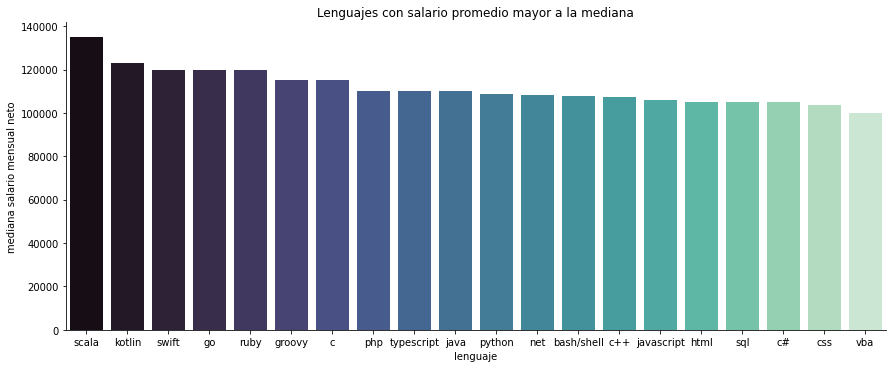

In [180]:
sns.catplot(x= 'lenguaje', y = 'mediana salario mensual neto', kind = "bar", data = leng_obj_salario,palette='mako', height=5, aspect=2.5).set(title='Lenguajes con salario promedio mayor a la mediana')

In [181]:
ubicacion=leng_obj_salario.index[leng_obj_salario['lenguaje']=='python'].tolist()
ubicacion = ubicacion[0] + 1
print('Python está en la posición {} del ranking de lenguajes asociados a los mejores salarios.'.format(ubicacion))

Python está en la posición 11 del ranking de lenguajes asociados a los mejores salarios.


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
